In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = yf.download('AAPL',start='2020-01-01',end='2024-04-01')
df.head(20)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960472,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251144,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826836,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484337,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650352,132079200
2020-01-09,76.809998,77.607498,76.550003,77.407501,75.214745,170108400
2020-01-10,77.650002,78.167503,77.062500,77.582497,75.384781,140644800
2020-01-13,77.910004,79.267502,77.787498,79.239998,76.995323,121532000
2020-01-14,79.175003,79.392502,78.042503,78.169998,75.955627,161954400


In [3]:
df.shape

(1067, 6)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1.067000e+03
mean,143.025530,144.659370,141.492369,143.153355,141.452000,9.683922e+07
std,33.768796,33.865376,33.644654,33.766705,34.141017,5.370459e+07
min,57.020000,57.125000,53.152500,56.092499,54.632893,2.404830e+07
25%,124.980000,126.381248,123.841248,125.039997,122.914204,6.185145e+07
50%,147.220001,149.050003,145.809998,147.410004,145.815475,8.222550e+07
75%,170.974998,172.629997,169.479996,171.135002,169.797562,1.138023e+08
max,198.020004,199.619995,197.000000,198.110001,197.589523,4.265100e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1067 entries, 2020-01-02 to 2024-03-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1067 non-null   float64
 1   High       1067 non-null   float64
 2   Low        1067 non-null   float64
 3   Close      1067 non-null   float64
 4   Adj Close  1067 non-null   float64
 5   Volume     1067 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 58.4 KB


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

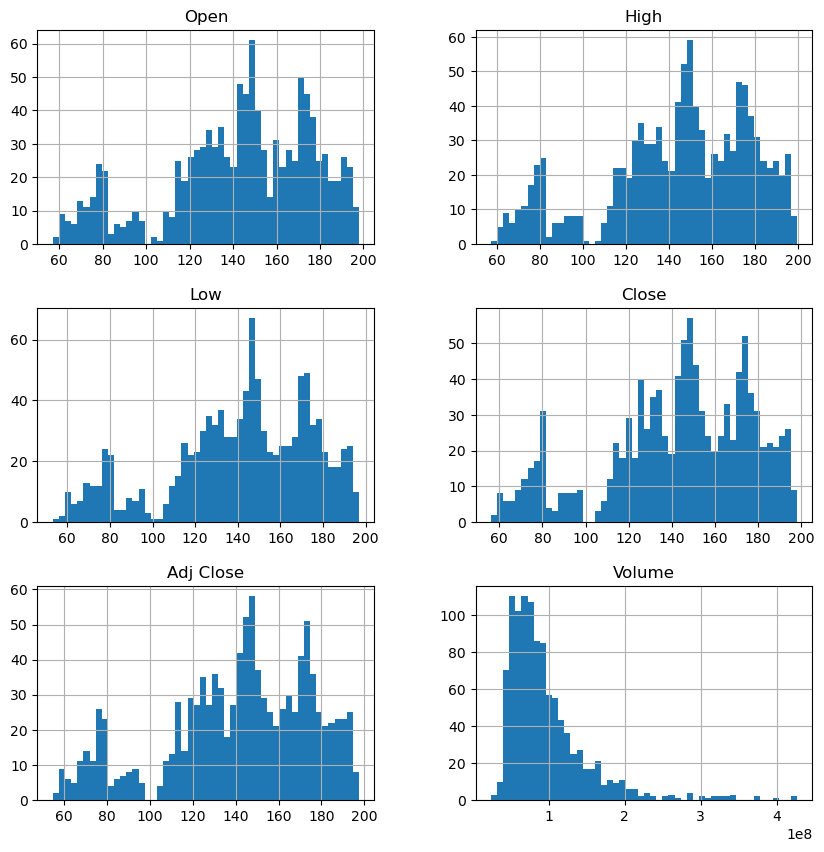

In [6]:
df.hist(bins=50,figsize=(10,10))

In [7]:
df["HL_Perc"] = (df["High"]-df["Low"]) / df["Low"] * 100
df["CO_Perc"] = (df["Close"] - df["Open"]) / df["Open"] * 100

In [8]:
df = df[["HL_Perc", "CO_Perc", "Adj Close", "Volume"]]

In [9]:
df["PriceNextMonth"] = df["Adj Close"].shift(-30)

/var/folders/qj/fxsf77sd1p38mdc08b1lfqrr0000gn/T/ipykernel_6422/2029729962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PriceNextMonth"] = df["Adj Close"].shift(-30)


In [10]:
df.tail()

,HL_Perc,CO_Perc,Adj Close,Volume,PriceNextMonth
Date,,,,,
2024-03-22,1.758206,0.302751,172.046646,71106600,NaN
2024-03-25,1.469463,0.164155,170.618591,54288300,NaN
2024-03-26,1.085031,-0.170584,169.480133,57388400,NaN
2024-03-27,2.051617,1.701774,173.075241,60273300,NaN
2024-03-28,1.008739,-0.157208,171.247726,65672700,NaN


In [11]:
X = np.array(df.drop(columns="PriceNextMonth",axis= 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
df.dropna(inplace = True)
y = np.array(df["PriceNextMonth"])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/var/folders/qj/fxsf77sd1p38mdc08b1lfqrr0000gn/T/ipykernel_6422/2492121259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [13]:
model = RandomForestRegressor()

In [14]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
accuracy = model.score(X_train, y_train)
accuracy

0.9818203088168045

In [16]:
model.fit(X,y)

RandomForestRegressor()

In [17]:
predictions = model.predict(X_test)
predictions

array([138.81743729, 136.87165192, 151.07000076, 186.10605286,
       129.96493668, 136.01444   ,  86.91093159, 156.49135254,
       161.20406128, 117.79116539, 192.06215927, 129.56108185,
       177.09572189, 143.72792763, 146.76982162, 154.28963684,
        67.13979038, 126.13879112, 139.20971741, 158.3343663 ,
       153.54842369,  68.4672953 , 126.90779495,  66.20684387,
       157.49318573, 166.70423279, 146.54170624, 168.0951004 ,
       144.71879349, 149.14202484, 128.21121681, 126.62725967,
       147.82834114,  72.6317952 , 156.66465347, 130.01746193,
       138.30752319, 160.30783356, 112.49128021, 147.37492371,
       137.47980209, 143.89960556, 122.28802734, 184.05493835,
        68.54400604, 108.83626785, 154.90670921, 144.9926944 ,
       139.39735855, 158.45408157, 139.26176582, 138.90835892,
        92.93866493, 145.28669449, 130.18417923, 146.71356155,
       144.20916946, 165.40643021, 177.44903168, 173.52946045,
       134.24333366, 155.15749908, 143.51091805,  87.11

In [18]:
df

,HL_Perc,CO_Perc,Adj Close,Volume,PriceNextMonth
Date,,,,,
2020-01-02,1.832719,1.387394,72.960472,135480400,79.123581
2020-01-03,1.376049,0.094228,72.251144,146322800,77.674774
2020-01-06,2.462849,2.045672,72.826836,118387200,78.799728
2020-01-07,1.149651,-0.483585,72.484337,108872000,77.991325
2020-01-08,2.449858,2.029209,73.650352,132079200,76.226006
...,...,...,...,...,...
2024-02-08,1.168928,-0.564968,187.825256,40962000,172.046646
2024-02-09,1.058514,0.106023,188.594208,45155200,170.618591
2024-02-12,1.006481,-0.674028,186.896500,41781900,169.480133


In [21]:
df.tail(20)

,HL_Perc,CO_Perc,Adj Close,Volume,PriceNextMonth
Date,,,,,
2024-01-18,1.781197,1.364936,188.134430,78005800,179.416656
2024-01-19,1.657658,1.177835,191.056732,68741000,174.862823
2024-01-22,1.596800,0.826831,193.380600,60133900,169.889572
2024-01-23,0.990558,0.082037,194.667221,42355600,168.890915
2024-01-24,1.049711,-0.470780,193.988998,53631300,168.771088
2024-01-25,1.636375,-0.537856,193.659882,54822100,170.498734
2024-01-26,1.469205,-0.952286,191.914474,44594000,172.516006
2024-01-29,1.382000,-0.145825,191.226273,47145600,172.995346
2024-01-30,2.309704,-1.518806,187.545975,55859400,170.898209


Text(0, 0.5, 'Price')

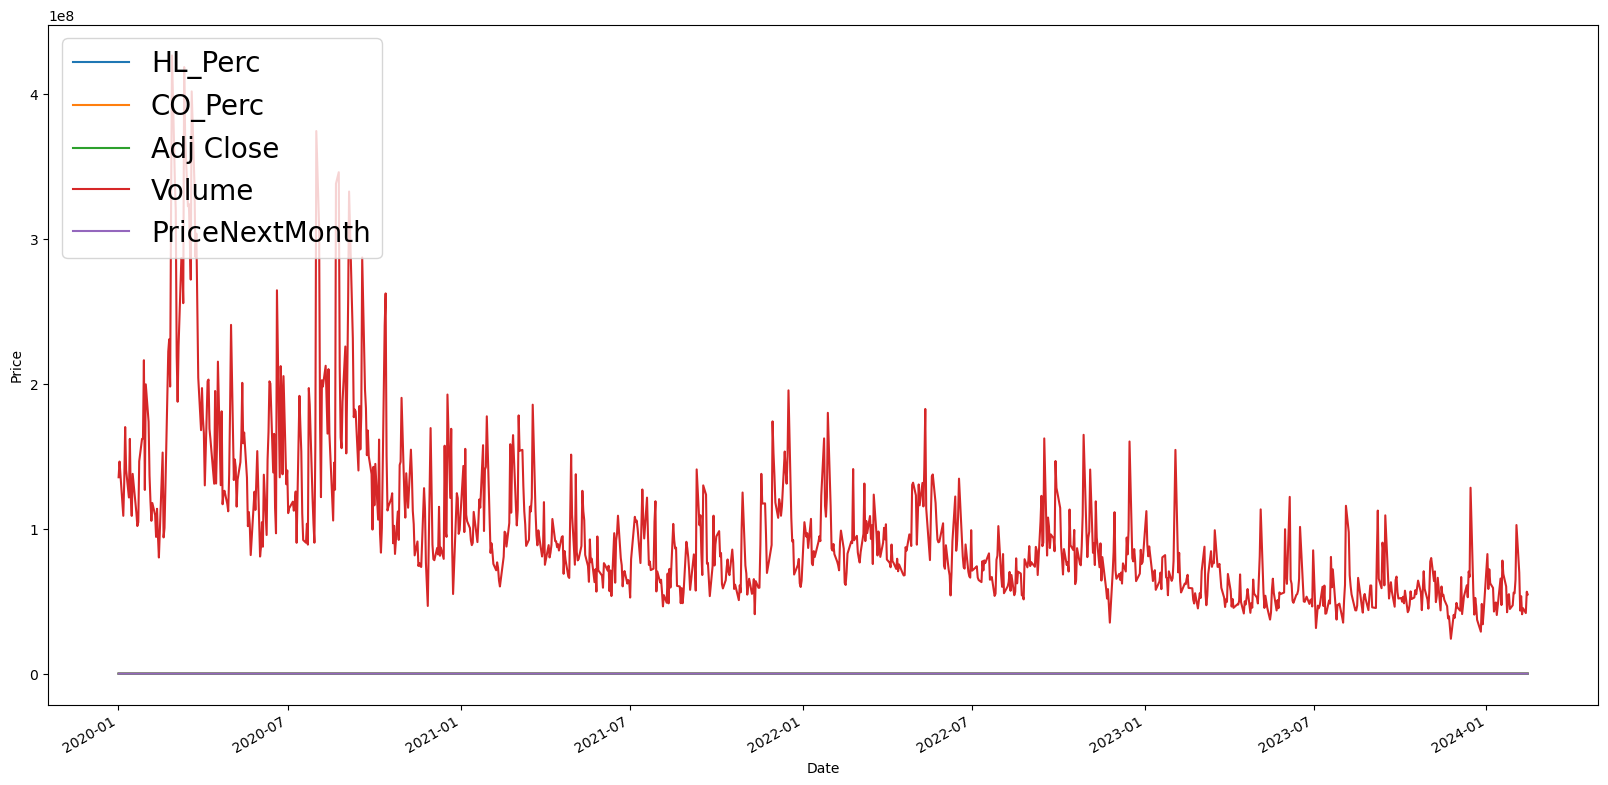

In [19]:
df.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')

<Axes: xlabel='Date'>

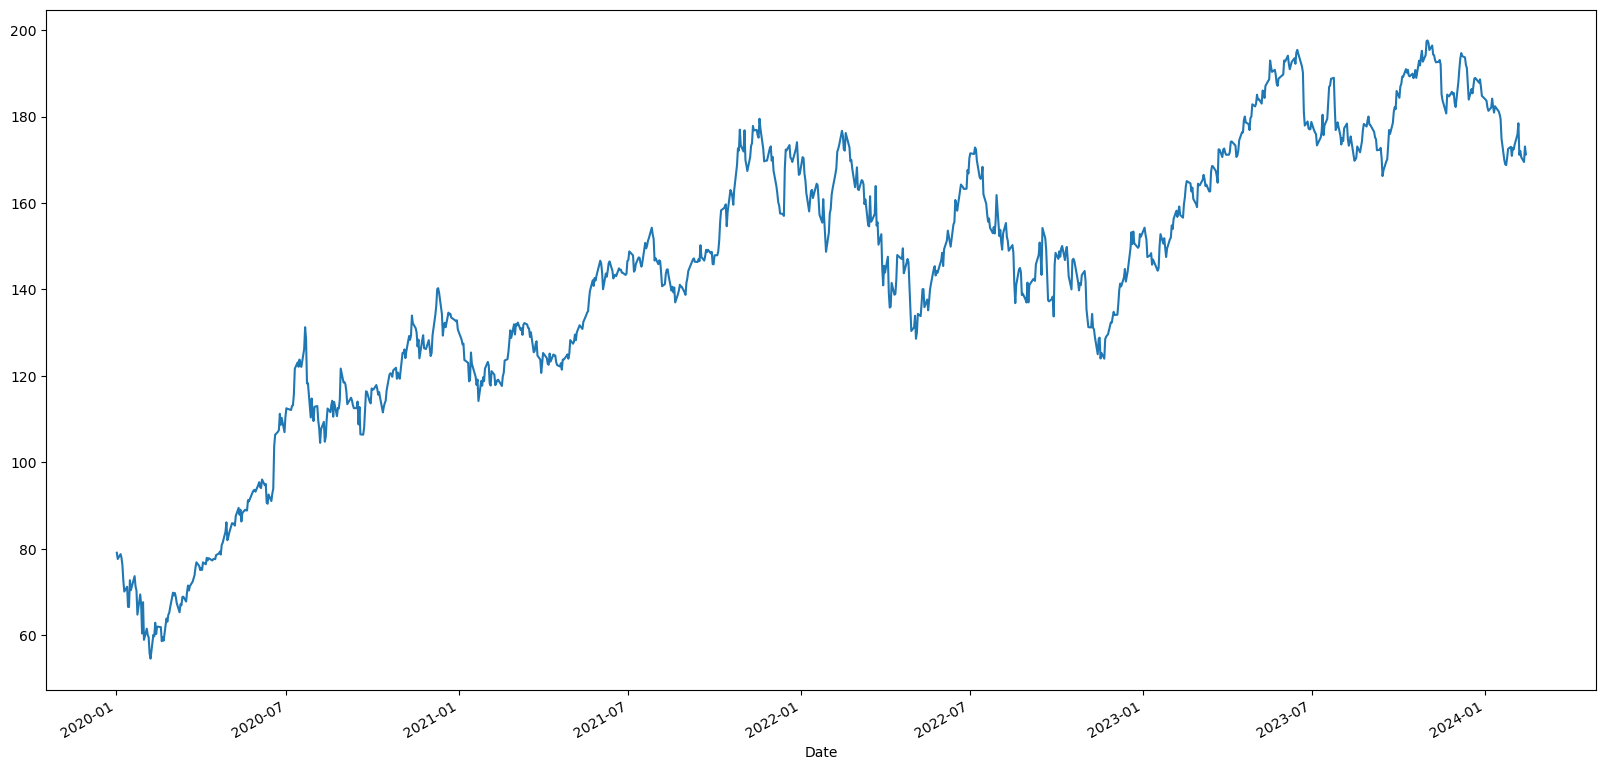

In [20]:
df.PriceNextMonth.plot(figsize=(20,10), linewidth=1.5)